In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import choice

# Approximating Images with circles using Differential Evolution Algorithms


In [2]:
#from differential_evolution import differential_evolution
from AuxFunctions import show_image, load_image, add_circle, show_fitness

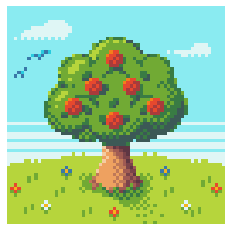

In [3]:
target = load_image('../Images/arbol.png', size=(64,64))
show_image(target)

In [4]:
phenotype = np.zeros(shape=target.shape)
phenotype.fill(255)

In [5]:
def objective_function(P):
    global target
    global phenotype
    
    new_phenotype = add_circle(phenotype, P)

    max_error = (np.square((1 - (target >= 127)) * 255 - target)).mean(axis=None)
    fit = (np.square(new_phenotype - target)).mean(axis=None)
    fit = (max_error - fit) / max_error
        
    return 1 - fit

In [6]:
def callback(P):
    global phenotype
    phenotype = add_circle(phenotype, P)
    show_image(phenotype)

In [7]:
bounds = [
    [0,1],                      # 1 X position
    [0,1],                      # 2 Y position
    [0,1],                      # 3 Radius
    [0,1],                      # 4 Red
    [0,1],                      # 5 Green
    [0,1],                      # 6 Blue
    [0,1]                       # 7 Alpha
]

In [68]:
class DifferentialEvolution:
    def __init__(self, objective_function, bounds, args=(), popsize=30, niter=100, callback=None):
        self.objective_function = objective_function
        self.bounds = np.array(bounds)
        self.genes = len(bounds)
        self.args = args
        self.popsize = popsize
        self.niter = niter
        self.population = None              # <np.array> len = popsize
        self.fitness = None                 # <np.array> len = len(self.population)
        self.callback = callback
        self.best = [-1,-1]

    def init_population(self):
        var_no = len(self.bounds)
        self.population = np.zeros((self.popsize, var_no))
        self.fitness = np.zeros((self.popsize))

        for val in range(var_no):
            min_val, max_val = self.bounds[val, 0], self.bounds[val, 1]
            self.population[:, val] = np.random.uniform(min_val, max_val, (self.popsize))

        for i in range(self.popsize):
            P = self.population[i,:]
            self.fitness[i] = self.objective_function(P, *self.args)

        self.best = 0, self.fitness[0]
        #print(self.population)

    def print_progress(self, g):
        print("GEN {}, FIT {:.8f}".format(g, np.mean(self.fitness)))

    def mutation(self):
        F = np.random.uniform(0,2)
        v = choice(self.population) + F * (choice(self.population) - choice(self.population))
        #v = self.population[self.best[0]] + F * (choice(self.population) - choice(self.population))
        return np.clip(v, self.bounds[:,0], self.bounds[:,1]) # bounds[:, 0], bounds[:, 1]

    def crossover(self, X, Y):
        choice = np.random.randint(2, size = X.size).reshape(X.shape).astype(bool)
        return np.where(choice, X, Y)

    def selection(self, X, Y, y_fitness):
        x_fitness = self.objective_function(X, *self.args)
        return (X, x_fitness) if x_fitness < y_fitness else (Y, y_fitness)

    def solve(self):
        self.init_population()

        for g in range(self.niter):
            for i, chromosome in enumerate(self.population):
                # MUTATION
                mutated = self.mutation()
                
                # CROSSOVER
                new_chrom = self.crossover(chromosome, mutated)

                # SELECTION
                self.population[i], self.fitness[i] = self.selection(new_chrom, chromosome, self.fitness[i])
                if self.fitness[i] < self.best[1]:
                    self.best = i, self.fitness[i]
            
            self.print_progress(g)
            
            if self.callback:
                best_value_idx = np.argmin(self.fitness)
                self.callback(self.population[best_value_idx])
        
        best_value_idx = np.argmin(self.fitness)
        return self.population[best_value_idx], self.fitness[best_value_idx]

def differential_evolution(objective_function, bounds, args=(), popsize=15, niter=10000, callback=None):
    return DifferentialEvolution(objective_function, bounds, args, popsize, niter, callback=callback).solve()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


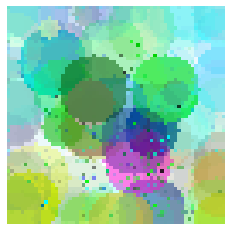

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


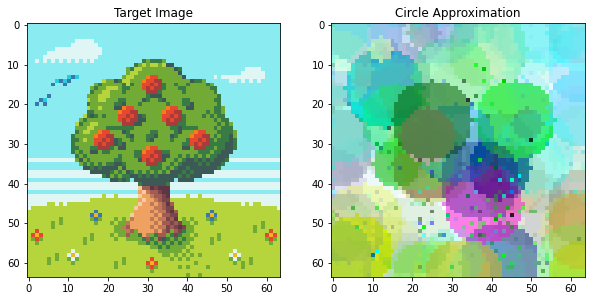

In [69]:
#res = differential_evolution(func=score, bounds=bounds, callback=callback, tol=-1)
phenotype.fill(255)
res = differential_evolution(objective_function=objective_function, bounds=bounds, callback=callback)
show_fitness(target, phenotype)